In [1]:
import rosbag
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

bag = rosbag.Bag('/home/miguel/catkin_ws/src/crazyflie/crazyflie_controller/src/data/h_inf_bag_circle_trim.bag')

import matplotlib.pyplot as plt

position_optitrack = []
desired_position = []
vel_optitrack = []
desired_vel = []
control_input = []

for topic, msg, t in bag.read_messages(topics=['position_Optitrack', 'vel_Optitrack', 'desired_position', 'desired_vel', 'control_input']):
    
    if topic == 'position_Optitrack':
        position_optitrack.append((msg.x, msg.y, msg.z))
        
    if topic == 'vel_Optitrack':
        vel_optitrack.append((msg.x, msg.y, msg.z))
        
    if topic == 'desired_position':
        desired_position.append((msg.x, msg.y, msg.z))
        
    if topic == 'desired_vel':
        desired_vel.append((msg.x, msg.y, msg.z))
    
    if topic == 'control_input':
        control_input.append((msg.x, msg.y, msg.z))
        
# After processing, close the bag
bag.close()

position_optitrack = np.array(position_optitrack)
vel_optitrack = np.array(vel_optitrack)
desired_position = np.array(desired_position)
desired_vel = np.array(desired_vel)
control_input = np.array(control_input)

In [2]:
time = []
initial_time = 0
Ts = 1/30

for i in range(len(position_optitrack)):
    time.append(initial_time)
    initial_time+=Ts

# X accel vs angle

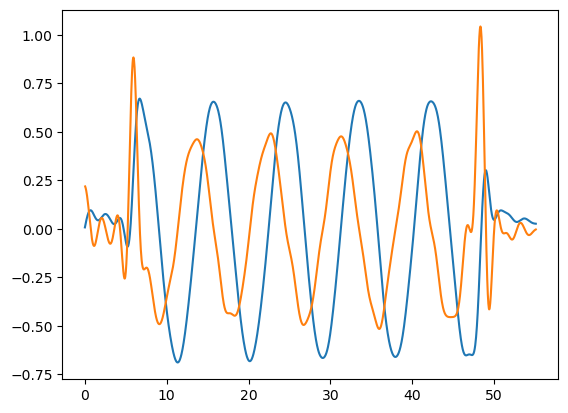

In [4]:
# Filter parameters
N = 5  # Filter order
Wn = 0.04  # Cutoff frequency (as a fraction of the Nyquist frequency)
b, a = butter(N, Wn, 'low')

# Filter the velocity
vel_optitrack_ = np.array(vel_optitrack)[:, 0]
filtered_velocity = filtfilt(b, a, vel_optitrack_.squeeze())

# Numerical differentiation to find acceleration
dt = np.diff(time)  # Time intervals
acceleration = np.diff(filtered_velocity) / dt  # Numerical derivative

plt.plot(time, [x for x in filtered_velocity], label='position_state_estimate z')
plt.plot(time[1:], [x for x in acceleration], label='position_state_estimate z')

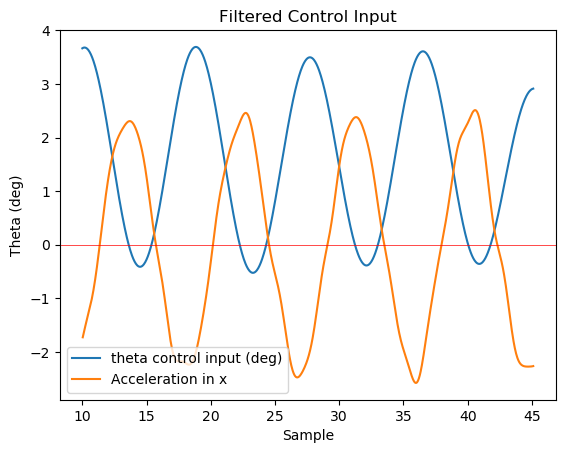

In [5]:
control_input_ = np.array(control_input)[:, 0]
# Design a Butterworth filter
N = 5  # Filter order
Wn = 0.01  # Cutoff frequency (as a fraction of the Nyquist frequency)
b, a = butter(N, Wn, 'low')

# Apply the filter
filtered_control_input = filtfilt(b, a, control_input_.squeeze())

# Convert to degrees
filtered_control_input_deg = np.rad2deg(filtered_control_input)

# Plotting
plt.plot(time[10*30:-10*30], filtered_control_input_deg[10*30:-10*30], label='theta control input (deg)')
plt.plot(time[(1+10*30):-10*30], [x*5 for x in acceleration[10*30:-10*30]], label='Acceleration in x')

plt.axhline(y=0, color='r', linewidth=0.5)
# plt.ylim(-2, 2)
plt.xlabel('Sample')
plt.ylabel('Theta (deg)')
plt.title('Filtered Control Input')
plt.legend()
plt.show()

In [6]:
np.mean(filtered_control_input_deg[10*30:-10*30])

1.567226695736758

# Y accel vs angle

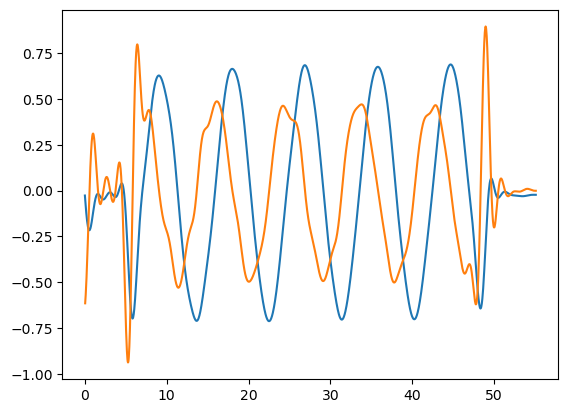

In [7]:
# Filter parameters
N = 5  # Filter order
Wn = 0.04  # Cutoff frequency (as a fraction of the Nyquist frequency)
b, a = butter(N, Wn, 'low')

# Filter the velocity
vel_optitrack_ = np.array(vel_optitrack)[:, 1]
filtered_velocity = filtfilt(b, a, vel_optitrack_.squeeze())

# Numerical differentiation to find acceleration
dt = np.diff(time)  # Time intervals
acceleration = np.diff(filtered_velocity) / dt  # Numerical derivative

plt.plot(time, [x for x in filtered_velocity], label='position_state_estimate z')
plt.plot(time[1:], [x for x in acceleration], label='position_state_estimate z')

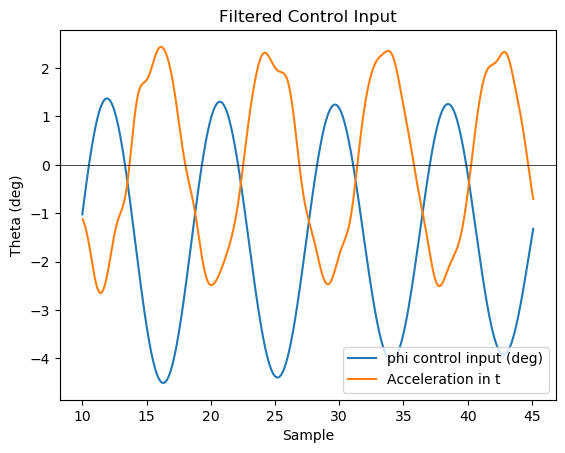

In [8]:
control_input_ = np.array(control_input)[:, 1]
# Design a Butterworth filter
N = 5  # Filter order
Wn = 0.01  # Cutoff frequency (as a fraction of the Nyquist frequency)
b, a = butter(N, Wn, 'low')

# Apply the filter
filtered_control_input = filtfilt(b, a, control_input_.squeeze())

# Convert to degrees
filtered_control_input_deg = np.rad2deg(filtered_control_input)

# Plotting
plt.plot(time[10*30:-10*30], filtered_control_input_deg[10*30:-10*30], label='phi control input (deg)')
plt.plot(time[(1+10*30):-10*30], [x*5 for x in acceleration[10*30:-10*30]], label='Acceleration in t')

plt.axhline(y=0, color='k', linewidth=0.5)
# plt.ylim(-2, 2)
plt.xlabel('Sample')
plt.ylabel('Theta (deg)')
plt.title('Filtered Control Input')
plt.legend()
plt.show()

In [9]:
np.mean(filtered_control_input_deg[10*30:-10*30])

-1.4752298119428802

In [10]:
-1.8+1.47

-0.33000000000000007

# X

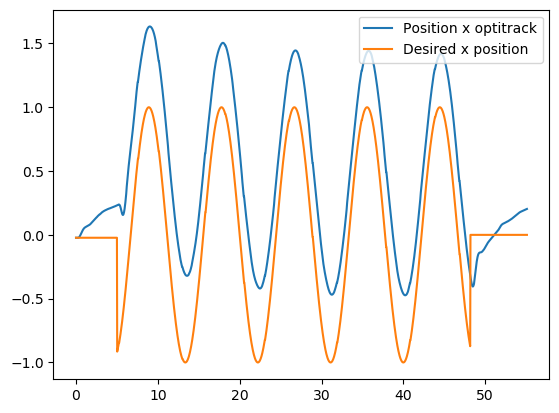

In [11]:
# Plotting example
plt.plot(time, [x[0] for x in position_optitrack], label='Position x optitrack')
plt.plot(time, [x[0] for x in desired_position], label='Desired x position')

# Adding a horizontal line
#plt.axhline(y=10, color='r', linewidth=0.5)
# plt.scatter(range(len(position_gaussian_error)), [x[2] for x in position_gaussian_error], label='position_gaussian_error z', s=0.7)
# Add more plots as needed
# plt.ylim(0.92, 1.02)
plt.legend()
plt.show()

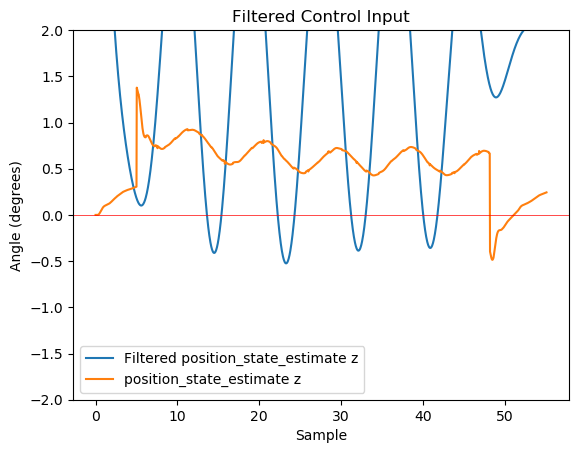

In [12]:
control_input_ = np.array(control_input)[:, 0]
# Design a Butterworth filter
N = 5  # Filter order
Wn = 0.01  # Cutoff frequency (as a fraction of the Nyquist frequency)
b, a = butter(N, Wn, 'low')

# Apply the filter
filtered_control_input = filtfilt(b, a, control_input_.squeeze())

# Convert to degrees
filtered_control_input_deg = np.rad2deg(filtered_control_input)

# Plotting
plt.plot(time, filtered_control_input_deg, label='Filtered position_state_estimate z')

error = desired_position - position_optitrack
plt.plot(time, [-x[0]*1.2 for x in error], label='position_state_estimate z')
plt.axhline(y=0, color='r', linewidth=0.5)
plt.ylim(-2, 2)
plt.xlabel('Sample')
plt.ylabel('Angle (degrees)')
plt.title('Filtered Control Input')
plt.legend()
plt.show()

1.2596687340558193

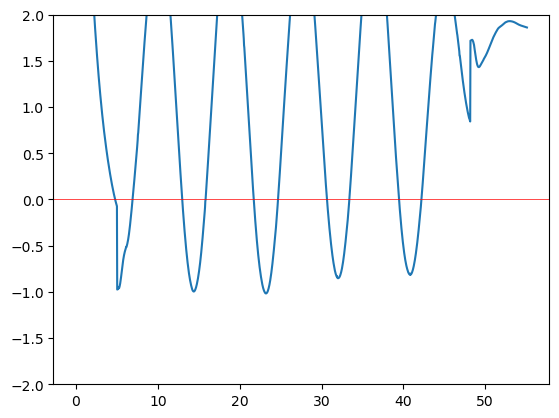

In [13]:
a = filtered_control_input_deg + error[:, 0]
plt.plot(time, a, label='Filtered position_state_estimate z')
plt.ylim(-2, 2)
plt.axhline(y=0, color='r', linewidth=0.5)
np.mean(a)

# Y

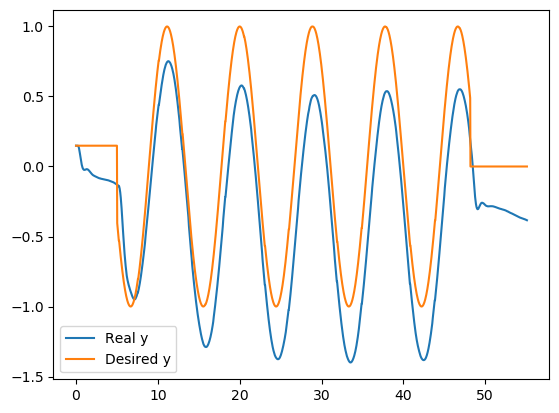

In [14]:
# Plotting example
plt.plot(time, [x[1] for x in position_optitrack], label='Real y')
plt.plot(time, [x[1] for x in desired_position], label='Desired y')

# Adding a horizontal line
#plt.axhline(y=10, color='r', linewidth=0.5)
# plt.scatter(range(len(position_gaussian_error)), [x[2] for x in position_gaussian_error], label='position_gaussian_error z', s=0.7)
# Add more plots as needed
# plt.ylim(0.92, 1.02)
plt.legend()
plt.show()

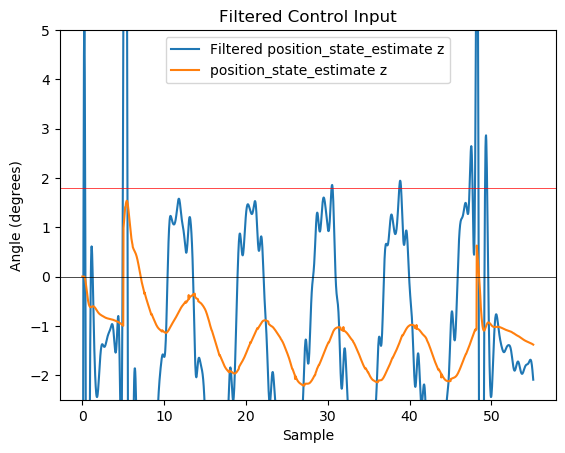

In [15]:

import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

control_input_ = np.array(control_input)[:, 1]
# Design a Butterworth filter
N = 5  # Filter order
Wn = 0.1  # Cutoff frequency (as a fraction of the Nyquist frequency)
b, a = butter(N, Wn, 'low')

# Apply the filter
filtered_control_input = filtfilt(b, a, control_input_.squeeze())

# Convert to degrees
filtered_control_input_deg = np.rad2deg(filtered_control_input)

# Plotting
plt.plot(time, filtered_control_input_deg, label='Filtered position_state_estimate z')

error = np.array(desired_position - position_optitrack)*3.6
plt.plot(time, [-x[1] for x in error], label='position_state_estimate z')
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axhline(y=1.8, color='r', linewidth=0.5)
plt.ylim(-2.5, 5)
plt.xlabel('Sample')
plt.ylabel('Angle (degrees)')
plt.title('Filtered Control Input')
plt.legend()
plt.show()

In [16]:
0.5*3.6

1.8

In [17]:
error[100:, 0]

array([-0.74374783, -0.74904358, -0.75335185, ..., -0.72480165,
       -0.7282367 , -0.73151962])